In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

from neurolib.models.wc import WCModel
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

fs=16
plt.rcParams.update({'font.size': fs})

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

wcdir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/boundaries_WC")
alndir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/boundaries_ALN")

In [3]:
col_lines = "black"
col_font = "gray"
col_points = "darkred"
col_lcbi = "darkblue"

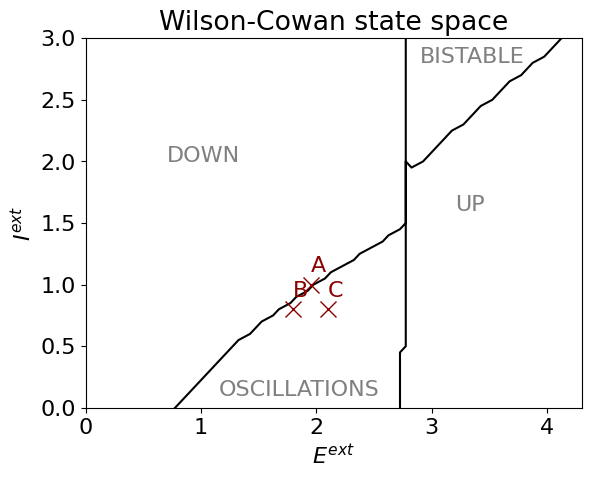

In [6]:
with open(os.path.join(wcdir, 'boundary_bi.pickle'), 'rb') as f:
    boundary_bi = pickle.load(f)

with open(os.path.join(wcdir, 'boundary_osc.pickle'), 'rb') as f:
    boundary_osc = pickle.load(f)

comp_points = [[1.95, 1., "A"], [1.8, 0.8, "B"], [2.1, 0.8, "C"], [1., 0.1, "D"], ]

plt.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
plt.plot(boundary_osc[0][:], boundary_osc[1][:], color=col_lines)

for pind in range(len(comp_points)):
    p=comp_points[pind]
    plt.plot(p[0], p[1], marker="x", markersize=12, color=col_points, clip_on=False)
    plt.text(p[0], p[1]+0.1, p[2], color=col_points, fontsize=fs)
plt.xlabel(r'$E^{ext}$')
plt.ylabel(r'$I^{ext}$')

plt.text(0.7, 2, "DOWN", color=col_font, fontsize=fs)
plt.text(3.2, 1.6, "UP", color=col_font, fontsize=fs)
plt.text(1.15, 0.1, "OSCILLATIONS", color=col_font, fontsize=fs)
plt.text(2.9, 2.8, "BISTABLE", color=col_font, fontsize=fs)

plt.xlim(0.,4.3)
plt.ylim(0,3)

plt.title("Wilson-Cowan state space")
plt.savefig(os.path.join(wcdir, "statespace.pdf"))

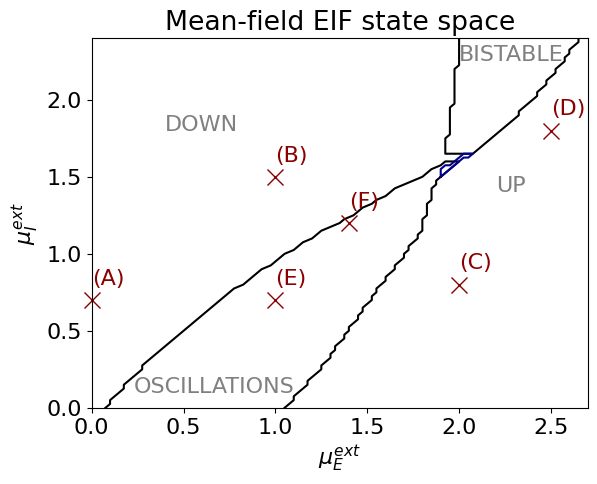

In [5]:
with open(os.path.join(alndir, 'boundary_bi.pickle'), 'rb') as f:
    boundary_bi = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LC.pickle'), 'rb') as f:
    boundary_osc = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LCbi.pickle'), 'rb') as f:
    boundary_oscbi = pickle.load(f)

boundary_bi = np.array(boundary_bi)
boundary_bi *= 5.0
boundary_osc = np.array(boundary_osc)
boundary_osc *= 5.0
boundary_oscbi = np.array(boundary_oscbi)
boundary_oscbi *= 5.0

comp_points = [[0., 0.7, "(A)"], [1., 1.5, "(B)"], [2., 0.8, "(C)"], [2.5, 1.8, "(D)"], [1.0, 0.7, "(E)"],[1.4, 1.2, "(F)"]]

plt.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
plt.plot(boundary_osc[0][:], boundary_osc[1][:], color=col_lines)
plt.plot(boundary_oscbi[0][:], boundary_oscbi[1][:], color=col_lcbi)

for pind in range(len(comp_points)):
    p=comp_points[pind]
    plt.plot(p[0], p[1], marker="x", markersize=12, color=col_points, clip_on=False)
    plt.text(p[0], p[1]+0.1, p[2], color=col_points, fontsize=fs)
plt.xlabel(r'$\mu_E^{ext}$')
plt.ylabel(r'$\mu_I^{ext}$')

plt.text(0.4, 1.8, "DOWN", color=col_font, fontsize=fs)
plt.text(2.2, 1.4, "UP", color=col_font, fontsize=fs)
plt.text(0.23, 0.1, "OSCILLATIONS", color=col_font, fontsize=fs)
plt.text(2.0, 2.25, "BISTABLE", color=col_font, fontsize=fs)

plt.xlim(0.,2.7)
plt.ylim(0,2.4)

plt.title("Mean-field EIF state space")
plt.savefig(os.path.join(alndir, "statespace.pdf"))

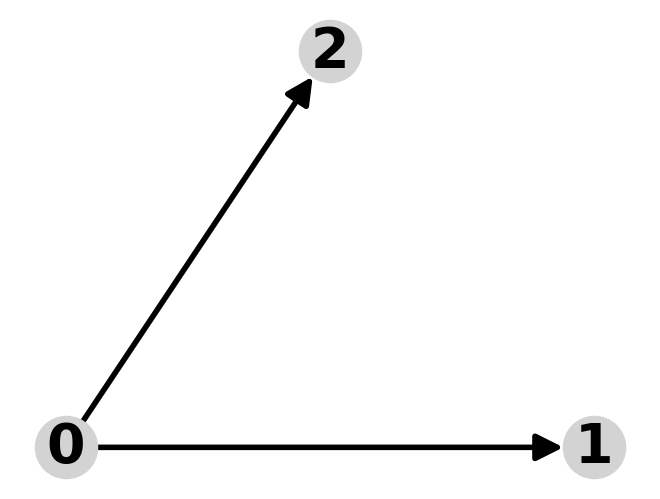

In [100]:
import networkx as nx

options = {
    'node_color': 'lightgray',
    'node_size': 2000,
    'width': 4,
    'arrowstyle': '-|>',
    'arrowsize': 40,
    'font_size' : 40,
    'font_weight' : 'bold',
    }

cmat = np.array( [[0., 0., 0.], [1., 0., 0.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1

N = cmat.shape[0]
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()

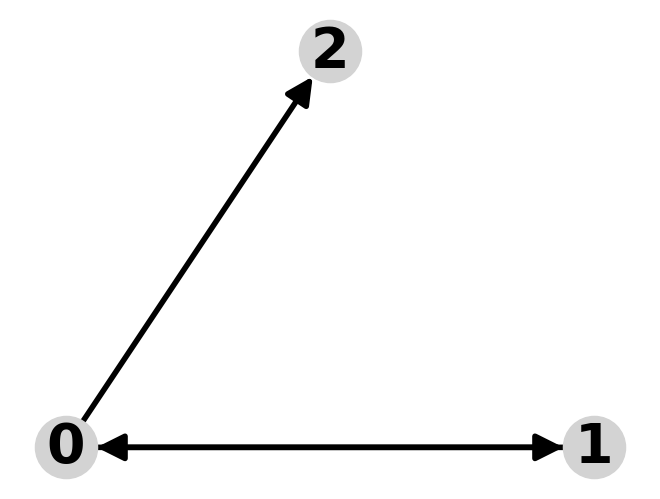

In [101]:
cmat = np.array( [[0., 1., 0.], [1., 0., 0.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()

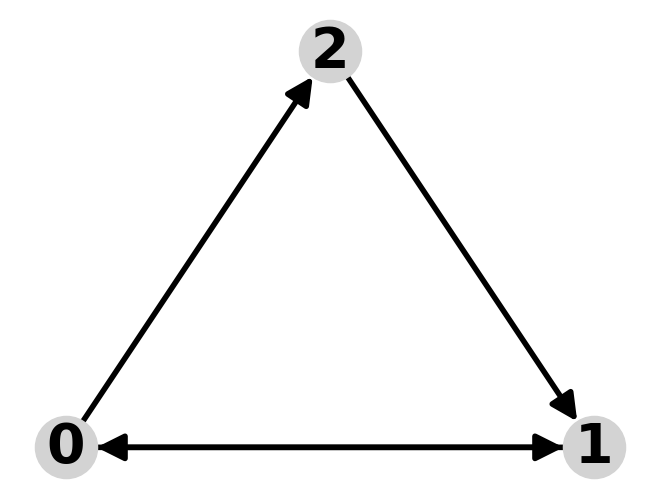

In [102]:

cmat = np.array( [[0., 1., 0.], [1., 0., 1.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()


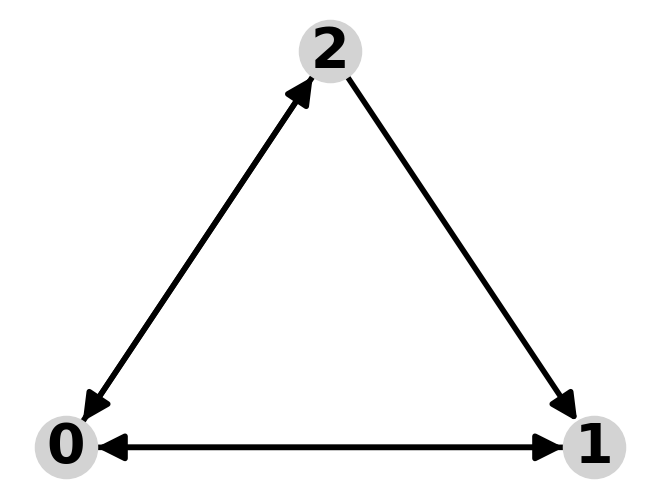

In [103]:

cmat = np.array( [[0., 1., 1.], [1., 0., 1.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()